In [1]:
from set_math import *
from set_visualization import *
from datasets_init import *

sympy imported
pandas imported
numpy imported
scipy imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported
matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary
train data successfully imported as train
train data successfully imported as test
you may now begin


In [5]:
% matplotlib inline
% config InlineBackend.figure_formats = {'png', 'retina'}

In [6]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [30]:
print(train.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB
None 



# 각 Feature 설명

- TripType = 타겟
- VisitNumber = ID (고객에 대한 고유한 ID)
- Weekday = 요일
- UPC = 구매한 아이템에 대한 고유 바코드
- ScanCount = UPC의 구매 수량 (음수일 때는 반품수량)
- DepartmentDescription = 대분류
- FinelineNumber = 소분류

In [7]:
print("rows :", train.shape[0],'\n' + "columns :", train.shape[1])
print("#n of VisitNumber :", train.VisitNumber.nunique(), '\n')
print("-- Unique Values --")
for i in train:
    print( i, ":", train[i].nunique())

rows : 647054 
columns : 7
#n of VisitNumber : 95674 

-- Unique Values --
TripType : 38
VisitNumber : 95674
Weekday : 7
Upc : 97714
ScanCount : 39
DepartmentDescription : 68
FinelineNumber : 5195


# 의문점

- ScanCount : 반품을 고려해야 하는가? 구매에 대한 분석이라면 ... 반품 성향까지는 고려하지 않아도 될 수도
- 결측치 : `Upc`, `DepartmentDescription`, `FinelineNumber` 각 1% 미만

In [31]:
train['ScanCount'] = train['ScanCount'].apply(lambda x: 0 if x < 0 else x)

In [32]:
train.dropna(how='any', inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642925 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 642925 non-null int64
VisitNumber              642925 non-null int64
Weekday                  642925 non-null object
Upc                      642925 non-null float64
ScanCount                642925 non-null int64
DepartmentDescription    642925 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ MB


# 각 TripType별 Department 출현 빈도

In [35]:
gb1 = train.groupby('VisitNumber')['DepartmentDescription'].value_counts()
gb1.head()

VisitNumber  DepartmentDescription
5            FINANCIAL SERVICES        1
7            PERSONAL CARE             1
             SHOES                     1
8            PAINT AND ACCESSORIES    16
             PETS AND SUPPLIES         2
Name: DepartmentDescription, dtype: int64

In [36]:
basket = train.pivot_table(values='ScanCount', columns="TripType", index="DepartmentDescription")

In [37]:
basket

TripType,3,4,5,6,7,8,9,12,14,15,...,36,37,38,39,40,41,42,43,44,999
DepartmentDescription,,,,,,,,,,,,,,,,,,,,,
1-HR PHOTO,1.000000,NaN,1.000000,5.000000,0.666667,NaN,1.162500,NaN,NaN,1.117647,...,1.428571,NaN,2.500000,NaN,1.000000,1.000000,1.142857,1.000000,NaN,0.816901
ACCESSORIES,1.000000,1.000000,1.000000,1.333333,0.909091,1.000000,0.989247,NaN,NaN,0.833333,...,1.000000,1.000000,1.000000,1.042105,1.104348,1.150000,1.026490,1.000000,1.063291,0.350877
AUTOMOTIVE,1.100000,1.000000,1.150000,1.000000,1.193548,1.053571,1.094488,1.000000,NaN,1.000000,...,1.125000,1.120690,1.035714,1.064220,1.112195,1.142857,1.095745,1.062016,1.095694,0.346154
BAKERY,1.000000,1.153846,1.196970,1.086957,1.286511,1.050847,1.032787,1.437500,NaN,1.166667,...,1.168675,1.200368,1.162162,1.136796,1.189604,1.162162,1.100000,1.180000,1.110236,1.051948
BATH AND SHOWER,1.000000,NaN,1.120000,1.000000,1.000000,0.888889,0.995516,1.500000,NaN,0.916667,...,1.058333,1.090909,1.111111,1.078947,1.194853,1.088435,1.147727,1.069307,1.143251,0.337748
BEAUTY,1.000000,1.000000,1.077586,1.000000,1.053333,1.020683,0.981707,1.111111,NaN,1.000000,...,1.115535,1.030303,1.016760,1.045167,1.066741,1.093220,1.049550,1.025751,1.095923,0.476015
BEDDING,1.000000,NaN,1.000000,1.500000,0.875000,0.833333,1.053846,2.000000,NaN,1.000000,...,1.125000,1.100000,1.000000,1.124260,1.140704,1.120000,1.302817,1.041667,1.144578,0.321429
BOOKS AND MAGAZINES,1.000000,NaN,1.000000,1.000000,1.000000,0.941176,0.990099,1.000000,NaN,1.000000,...,1.142857,1.000000,1.000000,0.990566,1.020408,1.000000,1.126866,0.933333,1.014286,0.346154
BOYS WEAR,1.000000,NaN,1.000000,1.000000,1.000000,0.875000,1.036630,1.000000,NaN,1.000000,...,1.055556,1.062500,0.952381,0.989474,1.017794,0.982301,1.066176,1.000000,1.014184,0.232432


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega10_r colormap was deprecated in version 2.0. Use tab10_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


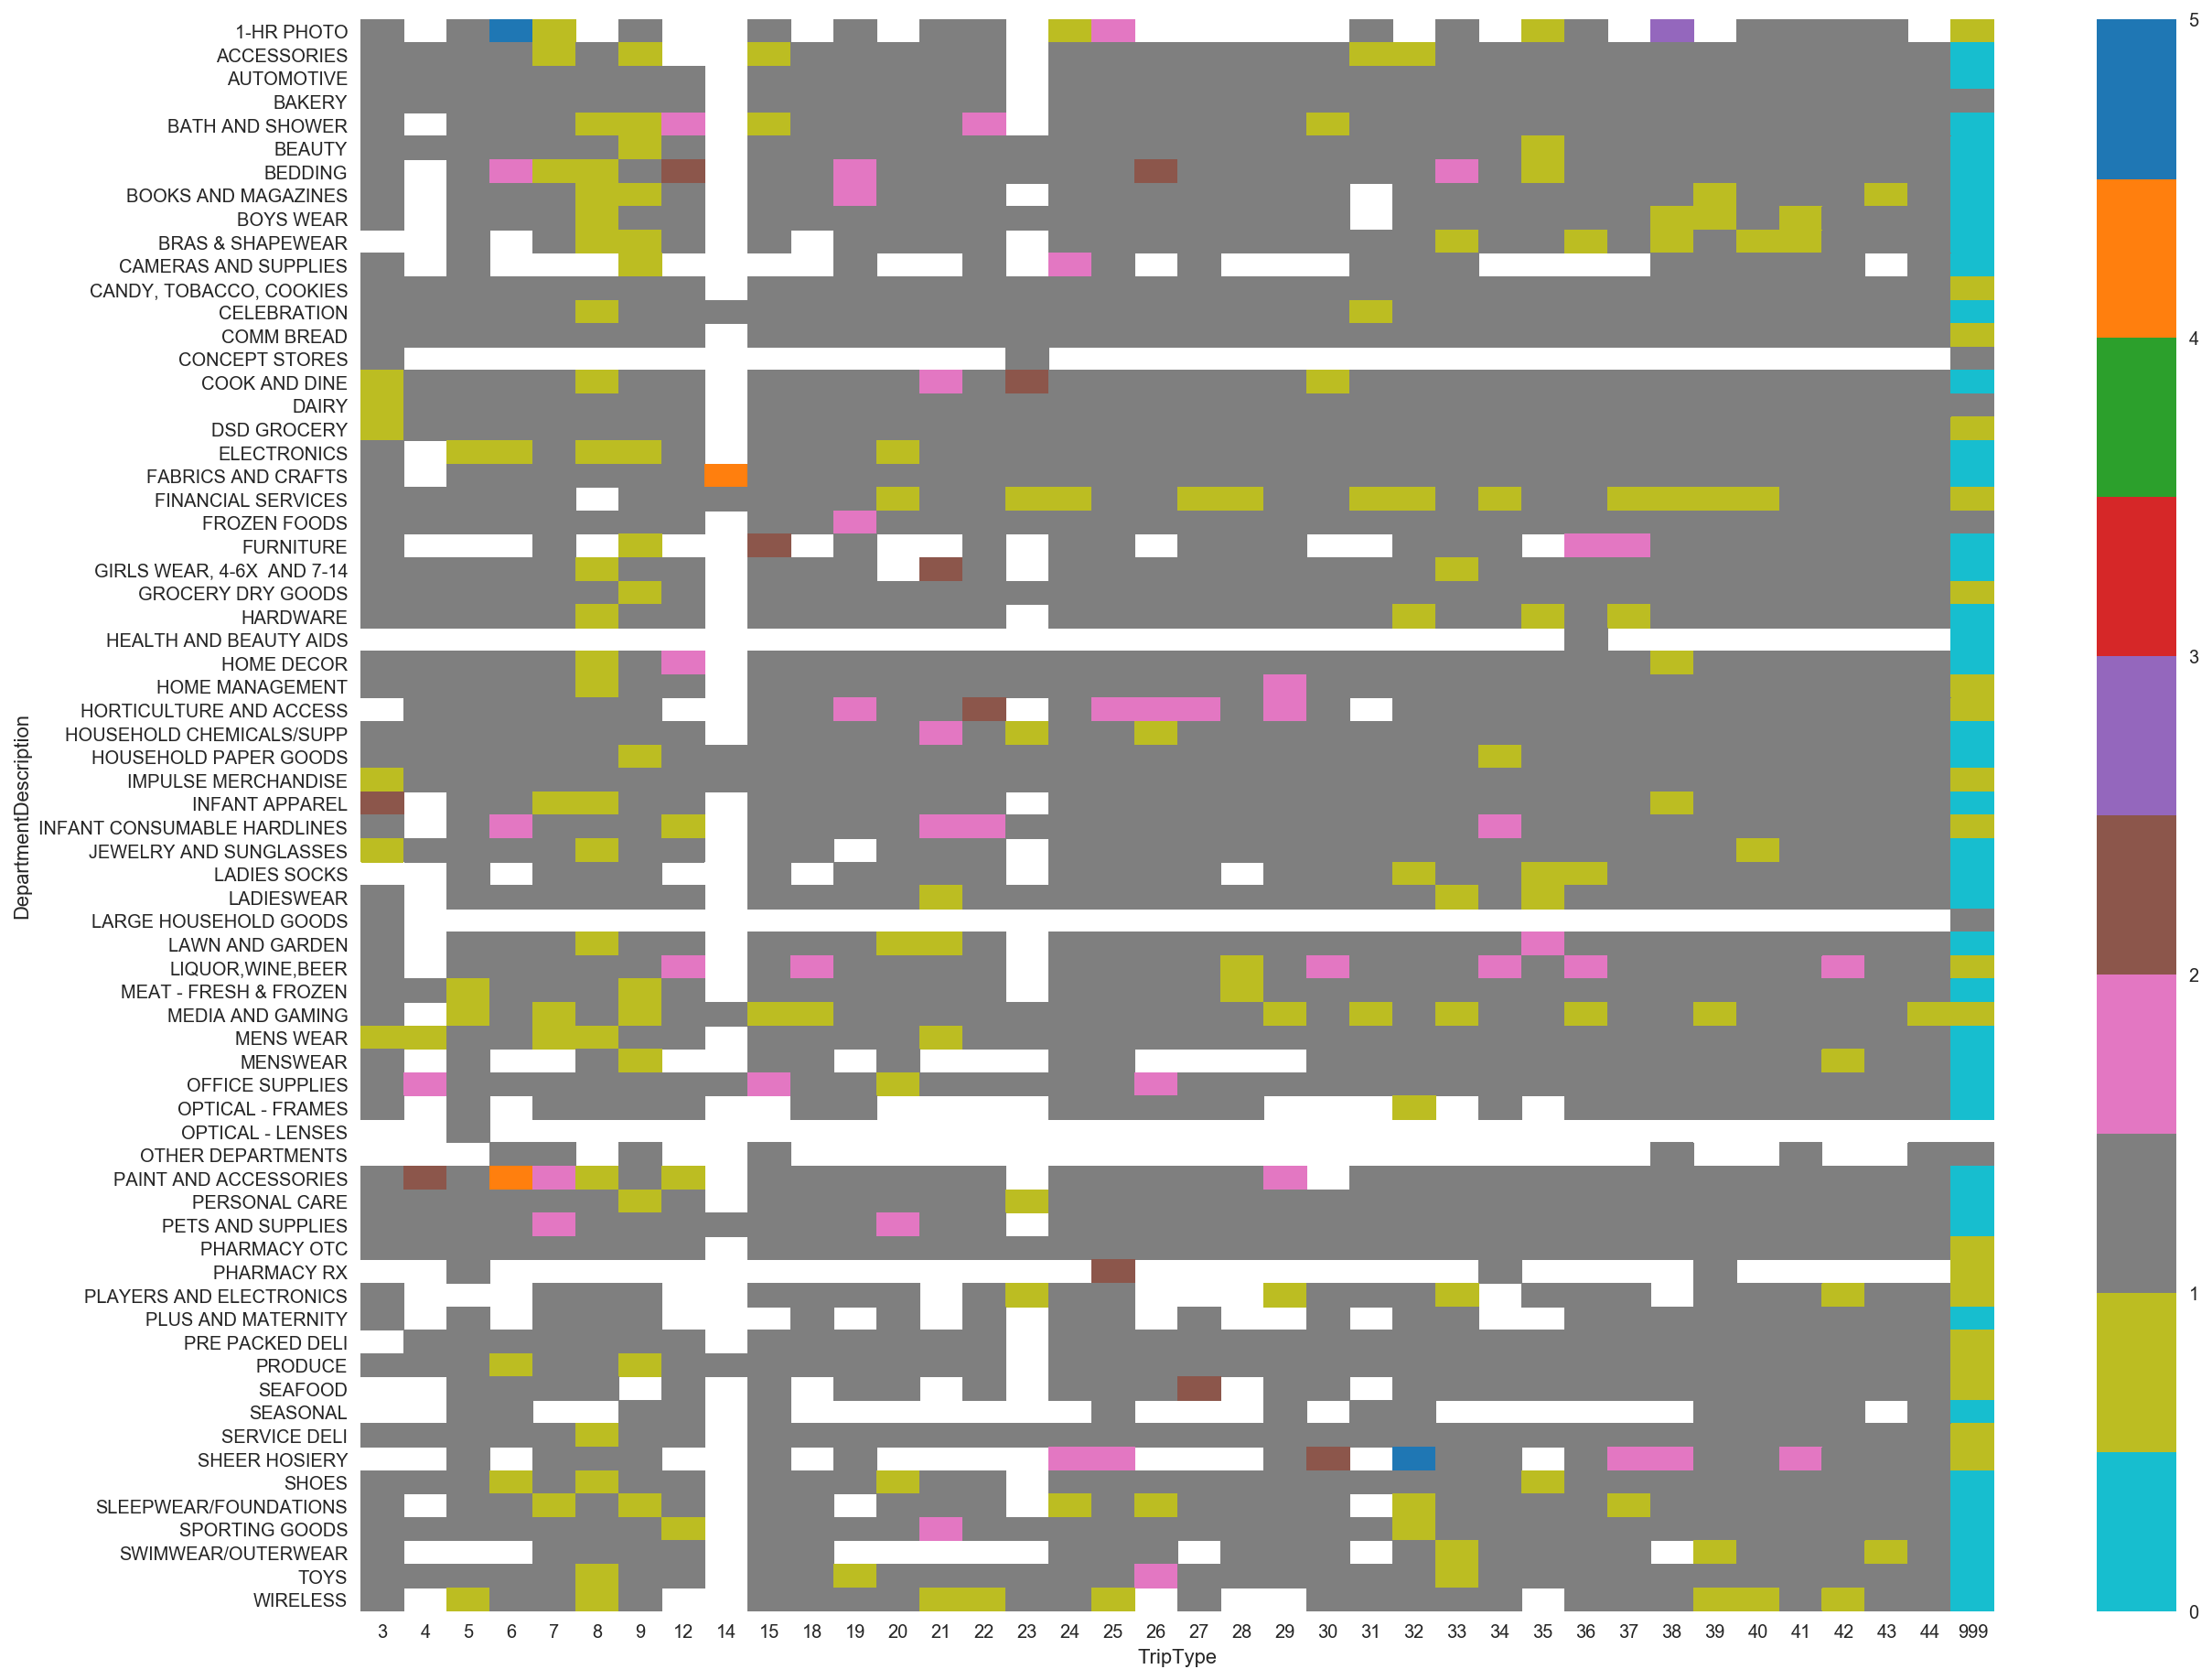

In [45]:
plt.figure(figsize=(20, 16))
sns.heatmap(basket, cmap="Vega10_r", cbar=True)
plt.show()